## 1. Data Import and Preparation

In [62]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [63]:
test = pd.read_csv("./dataset/test.csv")
train = pd.read_csv("./dataset/train.csv")

## 2. Exploratory Data Analysis

### 2.1 Columns
각각의 Column은 아래의 정보를 가지고 있음.
* id : 샘플 아이디
* Age : 나이
* TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
* CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
* DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
* Occupation : 직업
* Gender : 성별
* NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
* NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
* ProductPitched : 영업 사원이 제시한 상품
* PreferredPropertyStar : 선호 호텔 숙박업소 등급
* MaritalStatus : 결혼여부
* NumberOfTrips : 평균 연간 여행 횟수
* Passport : 여권 보유 여부 (0: 없음, 1: 있음)
* PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
* OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
* NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
* Designation : (직업의) 직급
* MonthlyIncome : 월 급여
* ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

### 2.2 Data Basic Info

Train Data는 20개의 column과 1955개의 데이터로 이루어져 있고, Test Data는 target label을 제외한 19개의 column과 2933개의 데이터로 이루어져 있음.

In [64]:
print(train.shape)
print(test.shape)

(1955, 20)
(2933, 19)


각각의 Row는 아래와 같은 데이터들을 포함되고 있음.

In [65]:
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


Train data와 Test data의 결측치는 아래와 같음.

In [66]:
train.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [67]:
test.isnull().sum()

id                            0
Age                         132
TypeofContact                15
CityTier                      0
DurationOfPitch             149
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            32
ProductPitched                0
PreferredPropertyStar        16
MaritalStatus                 0
NumberOfTrips                83
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     39
Designation                   0
MonthlyIncome               133
dtype: int64

결측치가 발생한 column은 Age, TypeofContact, CityTier, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome임.

### 2.3 Data Analyzation

각 Column의 correlation은 아래와 같음. 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


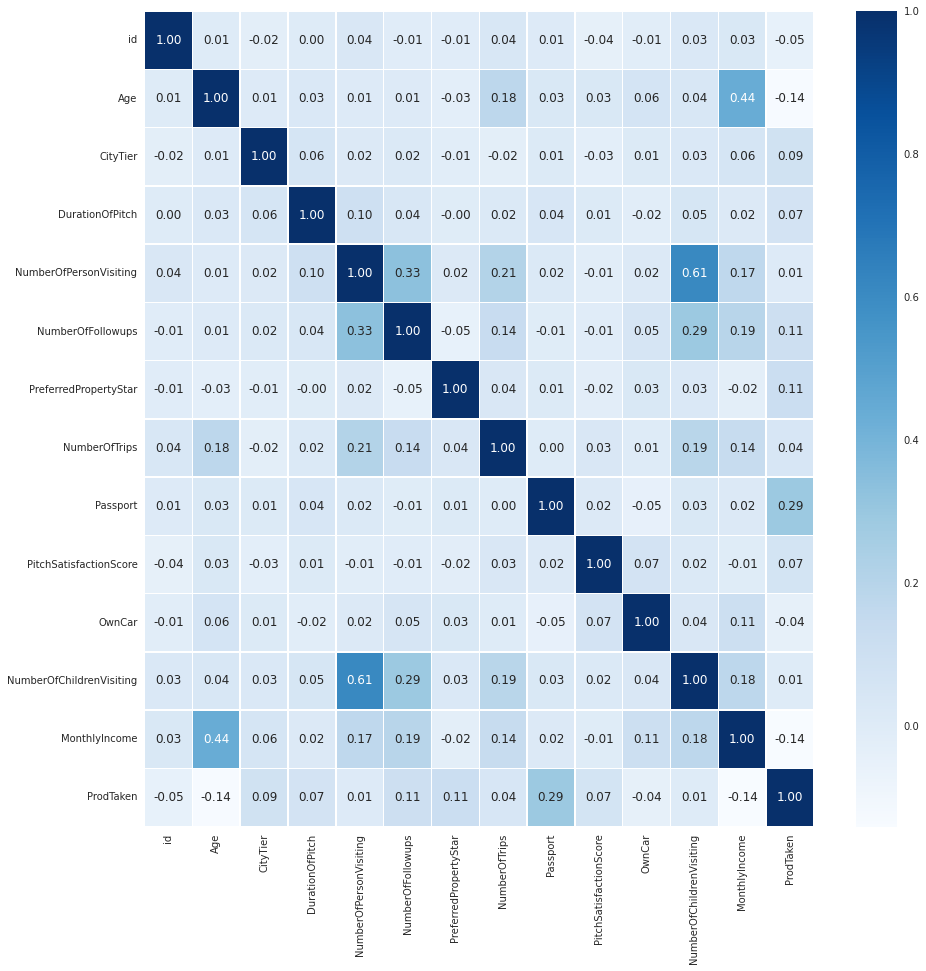

In [68]:
plt.figure(figsize=(15,15))
sb.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

Correlation map에서 가장 높은 correlation을 보여주는 것은 NumberOfPersonVisiting-NumverOfChildrenVisiting과 Age-MonthlyIncome NumberOfFollowups-NumberOfPersonVisiting 관계임.

* Age-MonthlyIncome 관계
  - Age가 증가할수록 MonthlyIncome 또한 증가하는 관계를 보임.

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


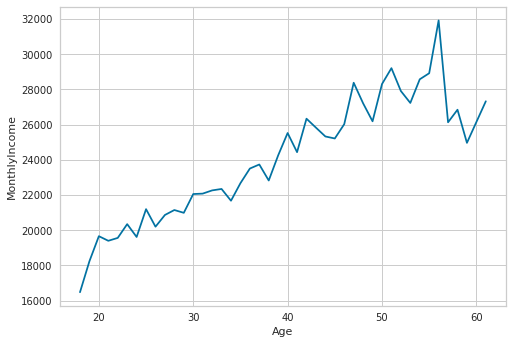

In [69]:
sb.lineplot(x="Age", y="MonthlyIncome", ci=None, data=train)

* NumberOfPersonVisiting-NumberOfChildrenVisiting 관계
  - NumberOfPersonVisiting이 증가할수록 NumberOfChildrenVisiting 또한 증가함.

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='NumberOfChildrenVisiting'>

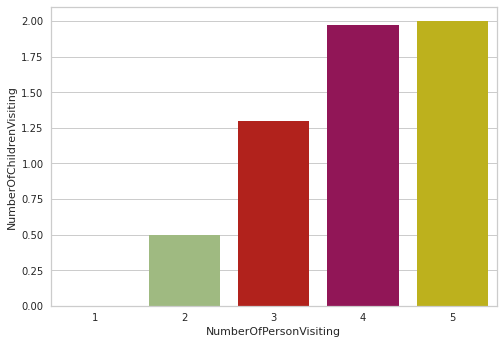

In [70]:
sb.barplot(x="NumberOfPersonVisiting", y="NumberOfChildrenVisiting", ci=None, data=train)

* NumberOfPersonVisiting-NumberOfFollowups 관계
  - Correlation이 높게 나왔지만, 크게 특징을 잡을 수 없음.

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='NumberOfFollowups'>

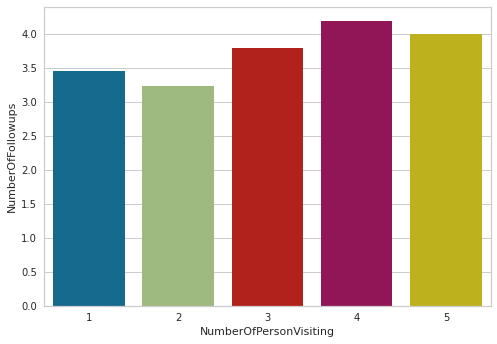

In [71]:
sb.barplot(x="NumberOfPersonVisiting", y="NumberOfFollowups", ci=None, data=train)

NumberOFFollowups의 최빈값과 평균값은 아래와 같음.

In [72]:
print(f"NumberOfFollowups 평균값은 "  + str(train["NumberOfFollowups"].mean()))
print(f"최빈 NumberOfFollowups 값은 " + str(train["NumberOfFollowups"].mode()[0]))

NumberOfFollowups 평균값은 3.718331616889804
최빈 NumberOfFollowups 값은 4.0


TypeofContact의 분포는 아래와 같음.

In [73]:
train["TypeofContact"].value_counts()

Self Enquiry       1379
Company Invited     566
Name: TypeofContact, dtype: int64

PreferredPropertyStar의 분포는 아래와 같음.

In [74]:
train["PreferredPropertyStar"].value_counts()

3.0    1212
5.0     373
4.0     360
Name: PreferredPropertyStar, dtype: int64

## 3. Data Processing

### 3.1 Fill NaN Value

앞선 EDA과정에서 발견된 insight를 바탕으로 결측치를 제거함.

* Age, MonthlyIncome의 경우 각 연령별(20대 미만, 20대, 30대, 40대, 50대, 60대이상)의 평균치와 가장 가까운 연령대, 금액대로 결측치를 채움

In [75]:
# 연령별 금액 평균치를 구함 - Age, MonthlyIncome 둘다 결측치가 아닌 경우만
income_avg = [[],[],[],[],[],[]]
for idx in range(len(train)):
    if not np.isnan(train["Age"][idx]) and not np.isnan(train["MonthlyIncome"][idx]):
        age_index = int(train["Age"][idx] // 10)
        if age_index < 2:
            age_index = 1
        elif age_index > 6:
            age_index = 6
        income_avg[age_index-1].append(train["MonthlyIncome"][idx])
result_income_avg = []
for i in income_avg:
    result_income_avg.append(np.mean(i))

# 구해진 평균값에 맞추어 결측치를 채움 - Age, MonthlyIncome 둘 중 하나만 결측치인 경우, 둘다 결측치인경우엔 따로 index 저장
age_list = [15,25,35,45,55,65]
train_nan = []
for idx in range(len(train)):
    if np.isnan(train["Age"][idx]) and np.isnan(train["Age"][idx]):
        train_nan.append(idx)
    elif np.isnan(train["Age"][idx]):
        min_idx = -1
        min_num = 1000000
        for i in range(len(result_income_avg)):
            diff = abs(result_income_avg[i] - train["MonthlyIncome"][idx])
            if diff < min_num:
                min_num = diff
                min_idx = i
        train["Age"][idx] = age_list[min_idx]
    elif np.isnan(train["MonthlyIncome"][idx]):
        age_idx = int(train["Age"][idx] // 10)
        if age_idx == 0:
            age_idx = 1
        elif age_idx > 6:
            age_idx = 6
        train["MonthlyIncome"][idx] = result_income_avg[age_idx-1]

# Test data 또한 동일하게 결측치를 채운다.
test_nan = []
for t_idx in range(len(test)):
    if np.isnan(test["Age"][t_idx]) and np.isnan(test["MonthlyIncome"][t_idx]):
        test_nan.append(t_idx)
    elif np.isnan(test["Age"][t_idx]):
        min_idx = -1
        min_num = 1000000
        for j in range(len(result_income_avg)):
            diff = abs(result_income_avg[j] - test["MonthlyIncome"][t_idx])
            if diff < min_num:
                min_num = diff
                min_idx = j
        test["Age"][t_idx] = age_list[min_idx]
    elif np.isnan(test["MonthlyIncome"][t_idx]):
        age_idx = int(test["Age"][t_idx] // 10)
        if age_idx == 0:
            age_idx = 1
        elif age_idx > 6:
            age_idx = 6
        test["MonthlyIncome"][t_idx] = result_income_avg[age_idx-1]

# Train, Test의 결측치 row들을 제거해준다.
train.drop(train_nan, axis=0, inplace=True)
test.drop(test_nan, axis=0, inplace=True)

* TypeOfContact의 경우 최빈값을 결측치에 삽입한다.

In [76]:
train["TypeofContact"].fillna(train["TypeofContact"].mode()[0], inplace=True)
test["TypeofContact"].fillna(train["TypeofContact"].mode()[0], inplace=True)

* DurationOfPitch의 경우는 평균값을 삽입한다.

In [77]:
train["DurationOfPitch"].fillna(train["DurationOfPitch"].mean(), inplace=True)
test["DurationOfPitch"].fillna(train["DurationOfPitch"].mean(), inplace=True)

* NumberOfFollowups의 경우 또한 평균값과 가장 많이나온 값인 4를 삽입한다.

In [78]:
train["NumberOfFollowups"].fillna(4, inplace=True)
test["NumberOfFollowups"].fillna(4, inplace=True)

* PreferredPropertyStar의 경우 최빈값을 삽입한다.

In [79]:
train["PreferredPropertyStar"].fillna(train["PreferredPropertyStar"].mode()[0], inplace=True)
test["PreferredPropertyStar"].fillna(train["PreferredPropertyStar"].mode()[0], inplace=True)

* NumberOfTrips의 경우 평균값을 삽입한다.

In [80]:
train["NumberOfTrips"].fillna(train["NumberOfTrips"].mean().astype("int64"), inplace=True)
test["NumberOfTrips"].fillna(train["NumberOfTrips"].mean().astype("int64"), inplace=True)

* NumberOfChildrenVisiting의 경우는 각 NumberofPersonVisiting에 맞는 평균치를 삽입한다.

In [81]:
train["NumberOfChildrenVisiting"].fillna(train.groupby("NumberOfPersonVisiting")["NumberOfChildrenVisiting"].transform("mean").astype("int64"), inplace=True)
test_new = []
for idx in range(len(test)):
    if np.isnan(test.iloc[idx]["NumberOfChildrenVisiting"]):
        test_new.append(train[train["NumberOfPersonVisiting"] == test.iloc[idx]["NumberOfPersonVisiting"]]["NumberOfChildrenVisiting"].mean().astype("int64"))
    else:
        test_new.append(test.iloc[idx]["NumberOfChildrenVisiting"])
test["NumberOfChildrenVisiting"] = test_new

In [82]:
train.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

In [83]:
test.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### 3.2 Outlier
Outlier의 경우 범위의 최대 혹은 최소값으로 변경해준다.

In [84]:
def change_outlier(col):
    q3 = train[col].quantile(q=0.75)
    q1 = train[col].quantile(q=0.25)
    iqr = 1.5 * (q3-q1)
    train.loc[train[col] < q1-iqr, col] = q1-iqr
    train.loc[train[col] > q3+iqr, col] = q3+iqr

<AxesSubplot:xlabel='DurationOfPitch'>

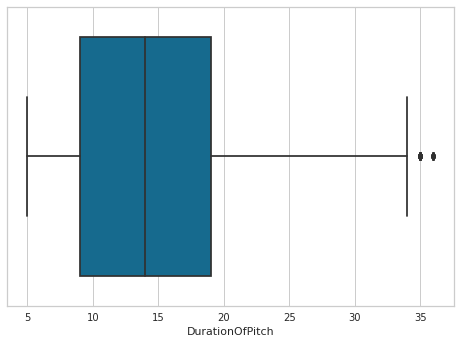

In [85]:
sb.boxplot(train["DurationOfPitch"])

In [86]:
change_outlier("DurationOfPitch")

<AxesSubplot:xlabel='DurationOfPitch'>

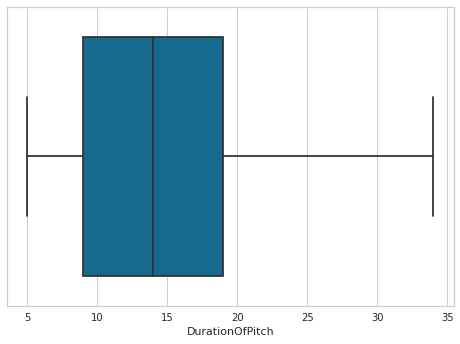

In [87]:
sb.boxplot(train["DurationOfPitch"])

<AxesSubplot:xlabel='MonthlyIncome'>

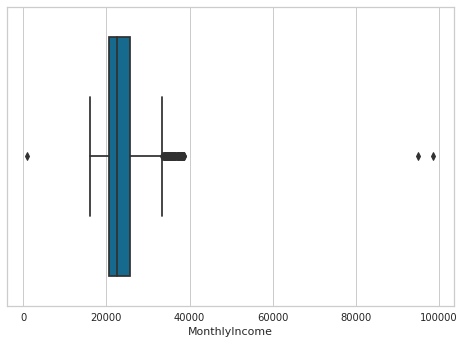

In [88]:
sb.boxplot(train["MonthlyIncome"])

In [89]:
change_outlier("MonthlyIncome")

<AxesSubplot:xlabel='MonthlyIncome'>

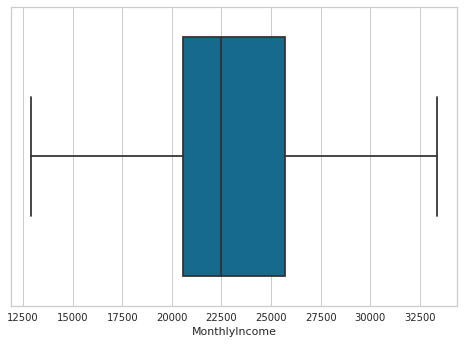

In [90]:
sb.boxplot(train["MonthlyIncome"])

<AxesSubplot:xlabel='NumberOfTrips'>

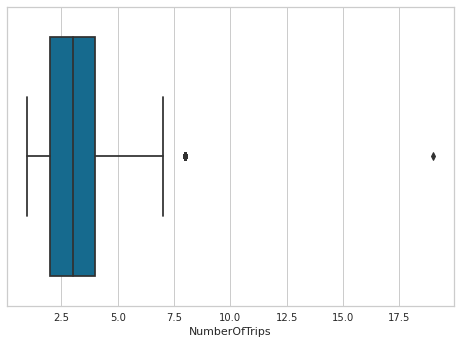

In [91]:
sb.boxplot(train["NumberOfTrips"])

In [92]:
change_outlier("NumberOfTrips")

<AxesSubplot:xlabel='NumberOfTrips'>

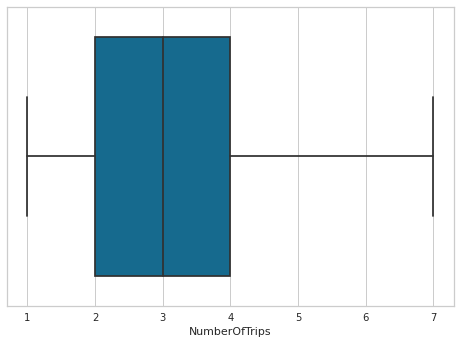

In [93]:
sb.boxplot(train["NumberOfTrips"])

### 3.3 Grouping into category
연속형값을 카테고리의 값으로 변경하여 예측하기 쉽도록 한다. 각각의 카테고리는 25%, 50%, 75% 지점으로 정한다.

In [94]:
train.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000
mean,981.364858,37.462117,1.651263,15.556637,2.951639,3.749597,3.560989,3.269210,0.289629,3.066093,0.620634,1.237507,23470.639020,0.195594
std,563.359002,9.189948,0.913068,7.854201,0.707733,1.000890,0.789149,1.702958,0.453712,1.367611,0.485360,0.852265,4607.511099,0.396764
min,1.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,12906.007485,0.000000
25%,492.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20574.002994,0.000000
50%,985.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22491.000000,0.000000
75%,1470.000000,43.000000,3.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25686.000000,0.000000
max,1955.000000,61.000000,3.000000,34.000000,5.000000,6.000000,5.000000,7.000000,1.000000,5.000000,1.000000,3.000000,33353.995509,1.000000


* Age

In [95]:
def age_grouping(data):
    data.loc[data["Age"] <= 31, "Age"] = 0
    data.loc[(data["Age"] > 31) & (data["Age"] <= 36), "Age"] = 1
    data.loc[(data["Age"] > 36) & (data["Age"] <= 43), "Age"] = 2
    data.loc[data["Age"] > 43, "Age"] = 3
    data["Age"] = data["Age"].astype("int64")

age_grouping(train)
age_grouping(test)

* DurationOfPitch

In [96]:
def duration_pitch(data):
    data.loc[data["DurationOfPitch"] <= 9, "DurationOfPitch"] = 0
    data.loc[(data["DurationOfPitch"] > 9) & (data["DurationOfPitch"] <=14), "DurationOfPitch"] = 1
    data.loc[(data["DurationOfPitch"] > 14) & (data["DurationOfPitch"] <= 19), "DurationOfPitch"] = 2
    data.loc[data["DurationOfPitch"] > 19,"DurationOfPitch"] = 3
    data["DurationOfPitch"] = data["DurationOfPitch"].astype("int64")

duration_pitch(train)
duration_pitch(test)

* MonthlyIncome

In [97]:
def income_group(data):
    data.loc[data["MonthlyIncome"] <= 20572, "MonthlyIncome"] = 0
    data.loc[(data["MonthlyIncome"] > 20572) & (data["MonthlyIncome"] <= 22661), "MonthlyIncome"] = 1
    data.loc[(data["MonthlyIncome"] > 22661) & (data["MonthlyIncome"] <= 25401.5), "MonthlyIncome"] = 2
    data.loc[data["MonthlyIncome"] >= 25401.5, "MonthlyIncome"] = 3
    data["MonthlyIncome"] = data["MonthlyIncome"].astype("int64")

income_group(train)
income_group(test)

### 3.4 Etc.
기존에 Str 카테고리를 int형으로 변경 해 준다.

In [98]:
train["TypeofContact"].value_counts()

Self Enquiry       1316
Company Invited     545
Name: TypeofContact, dtype: int64

In [99]:
contact_dict = {"Self Enquiry" :0, "Company Invited": 1}
train["TypeofContact"] = train["TypeofContact"].map(contact_dict)
test["TypeofContact"] = test["TypeofContact"].map(contact_dict)

In [100]:
train["Occupation"].value_counts()

Salaried          916
Small Business    785
Large Business    159
Free Lancer         1
Name: Occupation, dtype: int64

Free Lancer의 경우 Outlier의 특성을 보여 가장 비슷한 Salaried와 한 그룹으로 취급함.

In [101]:
occ_dict = {"Salaried":0, "Small Business":1, "Large Business":2, "Free Lancer":0}
train["Occupation"] = train["Occupation"].map(occ_dict)
test["Occupation"] = test["Occupation"].map(occ_dict)

In [102]:
train["Gender"].value_counts()

Male       1151
Female      654
Fe Male      56
Name: Gender, dtype: int64

Gender의 Fe Male은 데이터가 다수가 있지만, Female의 오타로 보여 한그룹으로 취급함.

In [103]:
gender_dict = {"Male":0, "Female":1, "Fe Male":1}
train["Gender"] = train["Gender"].map(gender_dict)
test["Gender"] = test["Gender"].map(gender_dict)

In [104]:
train["Designation"].value_counts()

Executive         692
Manager           649
Senior Manager    301
AVP               130
VP                 89
Name: Designation, dtype: int64

In [105]:
des_dict = {"Executive":0, "Manager":1, "Senior Manager":2, "AVP":3, "VP":4}
train["Designation"] = train["Designation"].map(des_dict)
test["Designation"] = test["Designation"].map(des_dict)

In [106]:
train["ProductPitched"].value_counts()

Basic           692
Deluxe          649
Standard        301
Super Deluxe    130
King             89
Name: ProductPitched, dtype: int64

In [107]:
product_dict = {"Basic":0, "Deluxe":1, "Standard":2, "Super Deluxe":3, "King":4}
train["ProductPitched"] = train["ProductPitched"].map(product_dict)
test["ProductPitched"] = test["ProductPitched"].map(product_dict)

In [108]:
train["MaritalStatus"].value_counts()

Married      905
Divorced     355
Single       319
Unmarried    282
Name: MaritalStatus, dtype: int64

In [109]:
marry_dict = {"Married":0, "Divorced":1, "Single":2, "Unmarried":3}
train["MaritalStatus"] = train["MaritalStatus"].map(marry_dict)
test["MaritalStatus"] = test["MaritalStatus"].map(marry_dict)

이외 모든 값은 int화 함.

In [110]:
train["NumberOfFollowups"] = train["NumberOfFollowups"].astype("int64")
test["NumberOfFollowups"] = test["NumberOfFollowups"].astype("int64")
train["PreferredPropertyStar"] = train["PreferredPropertyStar"].astype("int64")
test["PreferredPropertyStar"] = test["PreferredPropertyStar"].astype("int64")
train["NumberOfChildrenVisiting"] = train["NumberOfChildrenVisiting"].astype("int64")
test["NumberOfChildrenVisiting"] = test["NumberOfChildrenVisiting"].astype("int64")
train["NumberOfTrips"] = train["NumberOfTrips"].astype("int64")
test["NumberOfTrips"] = test["NumberOfTrips"].astype("int64")

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   id                        1861 non-null   int64
 1   Age                       1861 non-null   int64
 2   TypeofContact             1861 non-null   int64
 3   CityTier                  1861 non-null   int64
 4   DurationOfPitch           1861 non-null   int64
 5   Occupation                1861 non-null   int64
 6   Gender                    1861 non-null   int64
 7   NumberOfPersonVisiting    1861 non-null   int64
 8   NumberOfFollowups         1861 non-null   int64
 9   ProductPitched            1861 non-null   int64
 10  PreferredPropertyStar     1861 non-null   int64
 11  MaritalStatus             1861 non-null   int64
 12  NumberOfTrips             1861 non-null   int64
 13  Passport                  1861 non-null   int64
 14  PitchSatisfactionScore    1861 non-null 

In [112]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2859 entries, 0 to 2932
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   id                        2859 non-null   int64
 1   Age                       2859 non-null   int64
 2   TypeofContact             2859 non-null   int64
 3   CityTier                  2859 non-null   int64
 4   DurationOfPitch           2859 non-null   int64
 5   Occupation                2859 non-null   int64
 6   Gender                    2859 non-null   int64
 7   NumberOfPersonVisiting    2859 non-null   int64
 8   NumberOfFollowups         2859 non-null   int64
 9   ProductPitched            2859 non-null   int64
 10  PreferredPropertyStar     2859 non-null   int64
 11  MaritalStatus             2859 non-null   int64
 12  NumberOfTrips             2859 non-null   int64
 13  Passport                  2859 non-null   int64
 14  PitchSatisfactionScore    2859 non-null 

## 4. Training

### 4.1 Preparation

In [113]:
# Classification module
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#AutoML
from pycaret import classification

In [114]:
train.drop("id", axis=1, inplace=True)

# Data
y_train = train["ProdTaken"]
x_train = train.drop("ProdTaken", axis=1)
test_pred = test.copy()
test_pred = test_pred.drop("id", axis=1)

### 4.2 AutoML

In [115]:
auto_ml = classification.setup(data=train, target='ProdTaken', fold_strategy='stratifiedkfold')

,Description,Value
0,session_id,8245
1,Target,ProdTaken
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1861, 19)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


In [116]:
auto_ml_result = classification.compare_models(fold=10, round=3, sort='Accuracy', n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.858,0.835,0.347,0.844,0.482,0.418,0.476,0.368
rf,Random Forest Classifier,0.853,0.830,0.304,0.853,0.441,0.380,0.449,0.399
lightgbm,Light Gradient Boosting Machine,0.851,0.790,0.437,0.691,0.530,0.448,0.467,0.047
lr,Logistic Regression,0.849,0.790,0.375,0.711,0.488,0.412,0.441,0.385
gbc,Gradient Boosting Classifier,0.849,0.792,0.375,0.717,0.489,0.412,0.443,0.129
ridge,Ridge Classifier,0.846,0.000,0.312,0.758,0.437,0.368,0.418,0.015
ada,Ada Boost Classifier,0.844,0.780,0.366,0.686,0.474,0.394,0.422,0.067
lda,Linear Discriminant Analysis,0.843,0.790,0.394,0.665,0.493,0.409,0.429,0.018
knn,K Neighbors Classifier,0.815,0.714,0.191,0.594,0.287,0.212,0.258,0.083
svm,SVM - Linear Kernel,0.808,0.000,0.419,0.588,0.451,0.344,0.370,0.025


### 4.3 k-Fold

In [117]:
kfold = KFold(n_splits=20, shuffle=True, random_state=42)

print("---- Logistic Regression ----")
logis_k = LogisticRegression()
logis_k_score = cross_val_score(logis_k, x_train, y_train, cv=kfold, n_jobs=1, scoring="accuracy")
print(logis_k_score)
print(f"Average logis_k score: {np.mean(logis_k_score)} \n")

print("---- Support Vector Machine ----")
svm_k = SVC()
svm_k_score = cross_val_score(svm_k, x_train, y_train, cv=kfold, n_jobs=1, scoring='accuracy')
print(svm_k_score)
print(f"Average svm_k score: {np.mean(svm_k_score)} \n")

print("---- K-Nerest Neighbor ----")
knn_k = KNeighborsClassifier(n_neighbors=5)
knn_k_score = cross_val_score(knn_k, x_train, y_train, cv=kfold, n_jobs=1, scoring="accuracy")
print(knn_k_score)
print(f"Average knn_k score: {np.mean(knn_k_score)} \n")

print("---- Decision Tree ----")
tree_k = DecisionTreeClassifier()
tree_k_score = cross_val_score(tree_k, x_train, y_train, cv=kfold, n_jobs=1, scoring="accuracy")
print(tree_k_score)
print(f"Average tree_k score: {np.mean(tree_k_score)} \n")

print("---- Random Forest ----")
forest_k = RandomForestClassifier()
forest_k_score = cross_val_score(forest_k, x_train, y_train, cv=kfold, n_jobs=1, scoring="accuracy")
print(forest_k_score)
print(f"Average forest_k score: {np.mean(forest_k_score)} \n")

print("---- Extra Tree Classifier ----")
et_k = ExtraTreesClassifier()
et_k_score = cross_val_score(et_k, x_train, y_train, cv=kfold, n_jobs=1, scoring='accuracy')
print(et_k_score)
print(f"Average et_k score: {np.mean(et_k_score)} \n")

---- Logistic Regression ----
[0.78723404 0.82795699 0.8172043  0.8172043  0.8172043  0.83870968
 0.84946237 0.90322581 0.84946237 0.78494624 0.86021505 0.80645161
 0.83870968 0.82795699 0.87096774 0.83870968 0.90322581 0.79569892
 0.83870968 0.83870968]
Average logis_k score: 0.8355982612674444 

---- Support Vector Machine ----
[0.74468085 0.8172043  0.82795699 0.8172043  0.8172043  0.84946237
 0.87096774 0.92473118 0.86021505 0.8172043  0.86021505 0.82795699
 0.80645161 0.82795699 0.8172043  0.82795699 0.92473118 0.77419355
 0.84946237 0.87096774]
Average svm_k score: 0.8366964081445893 

---- K-Nerest Neighbor ----
[0.79787234 0.86021505 0.82795699 0.86021505 0.8172043  0.84946237
 0.86021505 0.92473118 0.87096774 0.83870968 0.83870968 0.80645161
 0.87096774 0.84946237 0.77419355 0.8172043  0.90322581 0.76344086
 0.86021505 0.87096774]
Average knn_k score: 0.8431194234728894 

---- Decision Tree ----
[0.80851064 0.89247312 0.87096774 0.80645161 0.84946237 0.83870968
 0.82795699 0.8

### 4.4 Ensemble
* Soft-Voting

In [118]:
ensemble_model = VotingClassifier(estimators=[('Random Forest', RandomForestClassifier()), ('Extra Tree', ExtraTreesClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('Logistic Regression', LogisticRegression())], voting='soft')
ensemble_score = cross_val_score(ensemble_model, x_train, y_train, cv=kfold, n_jobs=1, scoring='accuracy')
print(ensemble_score)
print(f"Average ensemble score: {np.mean(ensemble_score)} \n")

[0.85106383 0.87096774 0.86021505 0.82795699 0.88172043 0.90322581
 0.88172043 0.93548387 0.91397849 0.86021505 0.89247312 0.84946237
 0.83870968 0.92473118 0.90322581 0.89247312 0.93548387 0.8172043
 0.88172043 0.89247312]
Average ensemble score: 0.8807252345001142 



* Hard-Voting

In [119]:
ensemble_model_hard = VotingClassifier(estimators=[('Random Forest', RandomForestClassifier()), ('Extra Tree', ExtraTreesClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('Logistic Regression', LogisticRegression())], voting='hard')
ensemble_score_hard = cross_val_score(ensemble_model_hard, x_train, y_train, cv=kfold, n_jobs=1, scoring='accuracy')
print(ensemble_score_hard)
print(f"Average ensemble score: {np.mean(ensemble_score_hard)} \n")

[0.85106383 0.88172043 0.83870968 0.82795699 0.86021505 0.86021505
 0.87096774 0.92473118 0.88172043 0.86021505 0.91397849 0.86021505
 0.84946237 0.89247312 0.88172043 0.89247312 0.92473118 0.82795699
 0.87096774 0.87096774]
Average ensemble score: 0.8721230839624798 



## Submission

* Single-Model

In [120]:
et_final = ExtraTreesClassifier()
et_final.fit(x_train, y_train)
y_pred = et_final.predict(test_pred)
submission = pd.DataFrame({"id" : test["id"], "ProdTaken":y_pred})
submission.to_csv("submission.csv", index=False)

* Soft-Voting

In [121]:
ensemble_model_f = VotingClassifier(estimators=[('Random Forest', RandomForestClassifier()), ('Extra Tree', ExtraTreesClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('Logistic Regression', LogisticRegression())], voting='soft')
ensemble_model_f.fit(x_train, y_train)
y_pred = ensemble_model_f.predict(test_pred)
submission = pd.DataFrame({"id" : test["id"], "ProdTaken":y_pred})
submission.to_csv("submission_ensemble.csv", index=False)

* Hard-Voting

In [122]:
ensemble_model_h = VotingClassifier(estimators=[('Random Forest', RandomForestClassifier()), ('Extra Tree', ExtraTreesClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('Logistic Regression', LogisticRegression())], voting='hard')
ensemble_model_h.fit(x_train, y_train)
y_pred = ensemble_model_h.predict(test_pred)
submission = pd.DataFrame({"id" : test["id"], "ProdTaken":y_pred})
submission.to_csv("submission_ensemble_hard.csv", index=False)

## Catboost

In [123]:
import optuna
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [ ]:
def optimizerCAT(trial, x_train, y_train, x_test, y_test):
    param = {
        'random_state':42,
        'n_estimators': trial.suggest_int('n_estimators', 300, 3500),
        'depth': trial.suggest_int('depth', 6, 14),
        'fold_permutation_block': trial.suggest_int('fold_permutation_block', 1, 256),
        'learning_rate': trial.suggest_int('learning_rate', 0, 1),
        'od_pval': trial.suggest_float('od_pval', 0, 1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0, 4),
    }

    model = CatBoostClassifier(**param)
    CAT_model = model.fit(x_train, y_train, verbose= True)
    score = accuracy_score(CAT_model.predict(x_test), y_test)

    return score

In [ ]:
study = optuna.create_study(direction="maximaize", sampler=TPESampler())
study.optimize(optimizerCAT(trial))